# Wine quality

## Red analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#saving the dataset in a dataframe 'red_dataset'
red_dataset = pd.read_csv(r'C:\Users\giovanni\Desktop\datasets\wine_quality\winequality-red.csv', sep=';')
red_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Defining functions

In [3]:
#function that acquires the outliers over a set treshold from data given
#https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32
def detect_outliers(data):
    outliers = []
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [4]:
#function that takes the dataset and returns a summary table with descriptive statistics
def summary_table(dataset):
    mean = []
    median = []
    variance = []
    std_dev = []
    outliers_number = []
    outliers_values = []
    data = []
    for column in list(dataset):
        mean.append(np.nanmean(dataset[column][:]))
        median.append(np.nanmedian(dataset[column][:]))
        variance.append(np.nanvar(dataset[column][:]))
        std_dev.append(np.nanstd(dataset[column][:]))
        outliers_number.append(len(detect_outliers(dataset[column][:])))
        outliers_values.append(detect_outliers(dataset[column][:]))
    dataset_dic = {}
    dataset_dic['mean'] = mean
    dataset_dic['median'] = median
    dataset_dic['variance'] = variance
    dataset_dic['standard_deviation'] = std_dev
    dataset_dic['outliers_number'] = outliers_number
    dataset_dic['outliers_values'] = outliers_values
    summary_dataframe = pd.DataFrame(dataset_dic)
    summary_dataframe.index = list(dataset)
    return summary_dataframe

In [5]:
#removing outliers
def remove_outs(dataset):
    list_of_outliers = [detect_outliers(dataset[column][:]) for column in list(dataset)] #getting the list of outliers
    list_of_outliers = [item for sublist in list_of_outliers for item in sublist] #flattening the list of outliers
    list_of_out_indexes = []
    for indx in dataset.index.values: 
        for item in dataset.loc[indx]:
            if item in list_of_outliers: #checking the items of the row if they are in the list of outliers
                list_of_out_indexes.append(indx) #and the index is added to the list of indexes that do not contain outliers
    not_out_dataset = dataset.drop(list_of_out_indexes) #dropping all indexes
    return not_out_dataset

In [6]:
#replacing outliers for None values stackoverflow
#I don't want to do that for the quality column 
def replace_outliers(df):
    new_df = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']] #slicing df not to include the last column
    v = new_df.values
    mask = np.abs((v - v.mean(0)) / v.std(0)) > 3 #using a mask for values over a set treshold
    temp = df['quality']#temporarily storing the quality column
    df = df.drop(['quality'], axis=1)
    clean = pd.DataFrame(np.where(mask, np.nan, v), df.index, df.columns)
    clean['quality'] = temp #restoring quality unmodified
    return clean

In [7]:
#This function iterates through the dataset building histograms with a chosen color and saving them at the chosen path
def get_histograms(data, color, path, name):
    columns = list(data)
    for column in columns:
        plt.figure(figsize=(20, 10))
        hist = sns.distplot(data[column], color=str(color))
        hist.axes.set_title(column, fontsize=40)
        hist.set_xlabel(column,fontsize=25)
        hist.set_ylabel('density', fontsize=25)
        hist.tick_params(labelsize=20)
        plt.savefig(str(path)+str(name)+'_'+str(column))
    return print('Histograms successfully saved at '+str(path)+str(name)+'_'+str(column))

In [8]:
def get_boxplots(data, color, path, name):
    columns = list(data)
    for column in columns:
        plt.figure(figsize=(20, 10))
        box = sns.boxplot(x=data[column], color=str(color), linewidth=3.5, medianprops=dict(color="black", alpha=1.0))
        box.axes.set_title(c, fontsize=40)
        box.tick_params(labelsize=20)
        box.set_xlabel(column, fontsize=25)
        plt.savefig(str(path)+str(name)+'_'+str(column))
    return print('Boxplots successfully saved at '+str(path)+str(name)+'_'+str(column))

In [9]:
#NOT WORKING
#def get_heatcorr_matrix(data):
#    data_corr = data.corr()
#    mask = np.zeros_like(data_corr, dtype=bool) #creates an empty mask with False values
#    mask[np.triu_indices_from(mask)] = True #Return the indices for the upper-triangle of an (n, m) array
#    data_corr[mask] = np.nan(data_corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).highlight_null(null_color='#f1f1f1').set_precision(2))
#    return

In [10]:
def get_heatmap(correlation_matrix, path, name):
    mask = np.zeros_like(correlation_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(25, 15))
        ax = sns.heatmap(correlation_matrix, mask=mask, vmax=1.0, vmin=-1.0, center=0, cmap='coolwarm', annot=True, square=True)
#    plt.savefig(str(path)+str(name))
    return

### Red dataset exploratory analysis

In [11]:
#verifying unique values in the dataset
red_dataset.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [12]:
#verifying the presence of null values
red_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
#replacing outliers with nan values. Keeping the "quality" column unaltered
red_dataset_nout = replace_outliers(red_dataset)
red_dataset_nout

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
#creating a summary datafram from the dataset (with outliers)
summary_dataset = summary_table(red_dataset)
summary_dataset

,mean,median,variance,standard_deviation,outliers_number,outliers_values
fixed acidity,8.319637,7.90000,3.029521,1.740552,12,"[15.0, 15.0, 13.8, 14.0, 13.7, 13.7, 15.6, 14...."
volatile acidity,0.527821,0.52000,0.032042,0.179004,10,"[1.13, 1.07, 1.33, 1.33, 1.09, 1.24, 1.185, 1...."
citric acid,0.270976,0.26000,0.037924,0.194740,1,[1.0]
residual sugar,2.538806,2.20000,1.986654,1.409487,30,"[10.7, 7.3, 7.2, 7.0, 11.0, 11.0, 7.9, 7.9, 15..."
chlorides,0.087467,0.07900,0.002214,0.047051,31,"[0.368, 0.341, 0.332, 0.46399999999999997, 0.4..."
free sulfur dioxide,15.874922,14.00000,109.346457,10.456886,22,"[52.0, 51.0, 50.0, 68.0, 68.0, 54.0, 53.0, 52...."
total sulfur dioxide,46.467792,38.00000,1081.425636,32.885037,15,"[148.0, 153.0, 165.0, 151.0, 149.0, 147.0, 148..."
density,0.996747,0.99675,0.000004,0.001887,18,"[1.0032, 1.0026, 1.00315, 1.00315, 1.00315, 1...."
pH,3.311113,3.31000,0.023820,0.154338,8,"[3.9, 3.85, 2.74, 3.9, 3.78, 3.78, 4.01, 4.01]"
sulphates,0.658149,0.62000,0.028715,0.169454,27,"[1.56, 1.28, 1.2, 1.28, 1.95, 1.22, 1.95, 1.98..."


In [15]:
red_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
red_dataset_nout.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1587.000000,1589.000000,1598.000000,1569.000000,1568.000000,1577.000000,1584.000000,1581.000000,1591.000000,1572.000000,1591.000000,1599.000000
mean,8.270636,0.523433,0.270519,2.395953,0.081993,15.335447,45.304293,0.996731,3.308925,0.645312,10.404431,5.636023
std,1.652044,0.170437,0.194006,0.888824,0.022981,9.438471,30.474421,0.001776,0.149115,0.134846,1.035413,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.991200,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,37.000000,0.996740,3.310000,0.620000,10.100000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,61.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


In [17]:
#creating a summary datafram from the dataset (without outliers)
summary_dataset_nout = summary_table(red_dataset_nout)
summary_dataset_nout

,mean,median,variance,standard_deviation,outliers_number,outliers_values
fixed acidity,8.270636,7.90000,2.727531,1.651524,5,"[13.3, 13.4, 13.5, 13.3, 13.3]"
volatile acidity,0.523433,0.52000,0.029030,0.170383,4,"[1.04, 1.04, 1.035, 1.04]"
citric acid,0.270519,0.26000,0.037615,0.193945,0,[]
residual sugar,2.395953,2.20000,0.789504,0.888540,54,"[6.1, 6.1, 5.5, 5.9, 5.9, 5.1, 5.5, 5.5, 5.5, ..."
chlorides,0.081993,0.07900,0.000528,0.022974,38,"[0.17600000000000002, 0.17, 0.172, 0.178000000..."
free sulfur dioxide,15.335447,13.00000,89.028249,9.435478,5,"[47.0, 46.0, 45.0, 45.0, 45.0]"
total sulfur dioxide,45.304293,37.00000,928.104060,30.464800,14,"[145.0, 140.0, 141.0, 143.0, 144.0, 145.0, 144..."
density,0.996731,0.99674,0.000003,0.001775,5,"[0.9912, 1.0022, 1.0022, 1.0021, 1.0021]"
pH,3.308925,3.31000,0.022221,0.149068,1,[2.86]
sulphates,0.645312,0.62000,0.018172,0.134803,23,"[1.08, 1.12, 1.14, 1.08, 1.09, 1.08, 1.13, 1.1..."


In [18]:
#setting some seaborn
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_context("talk", rc={"lines.linewidth": 2.5, "lines.color": "black"})

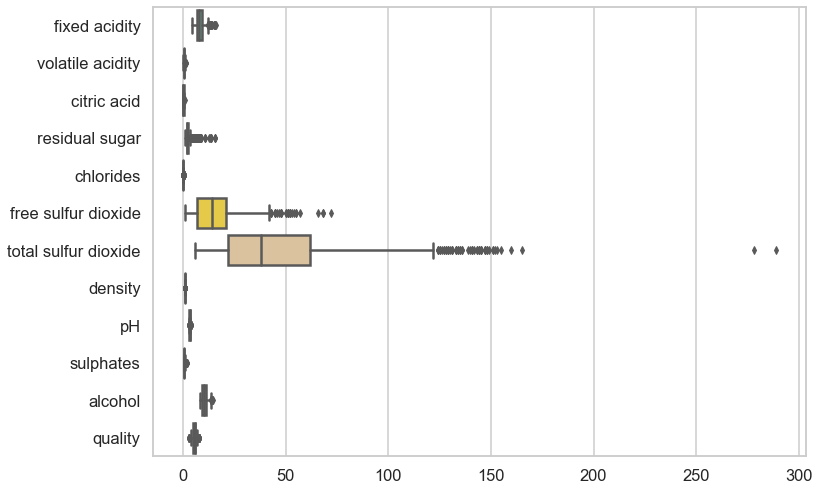

In [19]:
#boxplot of al variables with outliers
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(data=red_dataset, orient="h", palette="Set2", ax=ax)
#plt.savefig(path)

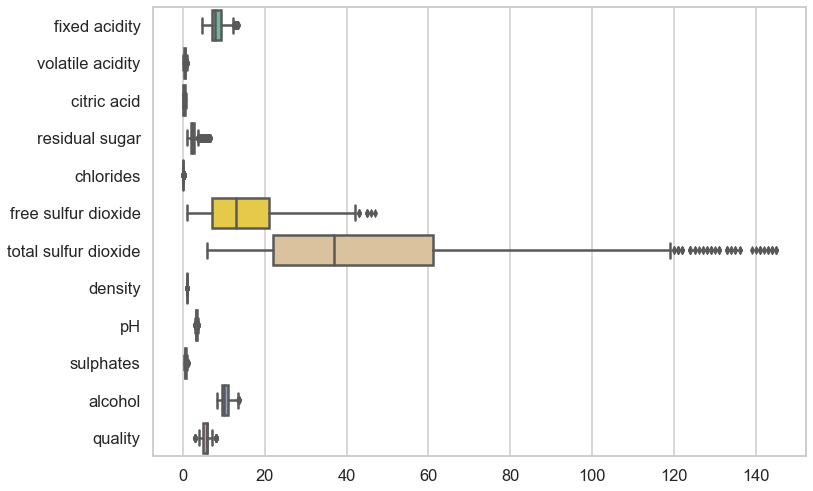

In [20]:
#boxplot of al variables without outliers
fig2, ax2 = plt.subplots()
fig2.set_size_inches(11.7, 8.27)
sns.boxplot(data=red_dataset_nout, orient="h", palette="Set2", ax=ax2)
#plt.savefig(path)

In [21]:
#get_histograms(red_dataset_nout, 'crimson', 'red')

In [22]:
#get_boxplots(red_dataset_nout, 'crimson', 'red')

In [23]:
red_dataset_corr = red_dataset.corr()
red_dataset_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [24]:
red_dataset_corrnout = red_dataset_nout.corr()
red_dataset_corrnout

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.266585,0.671423,0.171590,0.203500,-0.153813,-0.111438,0.656429,-0.667669,0.197527,-0.055544,0.122331
volatile acidity,-0.266585,1.000000,-0.561747,0.054465,0.104259,0.002832,0.098755,0.008294,0.225051,-0.325177,-0.210089,-0.371854
citric acid,0.671423,-0.561747,1.000000,0.167057,0.098305,-0.055754,0.006998,0.366540,-0.540366,0.318681,0.124550,0.232439
residual sugar,0.171590,0.054465,0.167057,1.000000,0.147925,-0.010520,0.099316,0.349822,-0.063717,0.074006,0.136489,0.034226
chlorides,0.203500,0.104259,0.098305,0.147925,1.000000,-0.082068,0.062577,0.331262,-0.187140,0.050514,-0.245763,-0.148301
free sulfur dioxide,-0.153813,0.002832,-0.055754,-0.010520,-0.082068,1.000000,0.661388,-0.037019,0.082589,0.035082,-0.066852,-0.046805
total sulfur dioxide,-0.111438,0.098755,0.006998,0.099316,0.062577,0.661388,1.000000,0.116349,-0.045700,-0.042959,-0.249369,-0.206907
density,0.656429,0.008294,0.366540,0.349822,0.331262,-0.037019,0.116349,1.000000,-0.317774,0.139652,-0.482217,-0.165710
pH,-0.667669,0.225051,-0.540366,-0.063717,-0.187140,0.082589,-0.045700,-0.317774,1.000000,-0.075071,0.159045,-0.069041
sulphates,0.197527,-0.325177,0.318681,0.074006,0.050514,0.035082,-0.042959,0.139652,-0.075071,1.000000,0.179030,0.356937


In [25]:
#difference between correlation with and without outliers
diff_corred = np.abs(red_dataset_corrnout - red_dataset_corr)
diff_corred

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.000000,0.010454,0.000281,0.056813,0.109795,0.000019,0.001744,0.011618,0.015309,0.014522,0.006124,0.001721
volatile acidity,0.010454,0.000000,0.009251,0.052547,0.042961,0.013336,0.022285,0.013732,0.009887,0.064190,0.007801,0.018704
citric acid,0.000281,0.009251,0.000000,0.023480,0.105518,0.005225,0.028535,0.001592,0.001538,0.005911,0.014647,0.006066
residual sugar,0.056813,0.052547,0.023480,0.000000,0.092316,0.197569,0.103712,0.005461,0.021936,0.068479,0.094414,0.020494
chlorides,0.109795,0.042961,0.105518,0.092316,0.000000,0.087630,0.015177,0.130630,0.077886,0.320746,0.024623,0.019395
free sulfur dioxide,0.000019,0.013336,0.005225,0.197569,0.087630,0.000000,0.006279,0.015073,0.012211,0.016575,0.002557,0.003851
total sulfur dioxide,0.001744,0.022285,0.028535,0.103712,0.015177,0.006279,0.000000,0.045080,0.020795,0.085906,0.043715,0.021806
density,0.011618,0.013732,0.001592,0.005461,0.130630,0.015073,0.045080,0.000000,0.023925,0.008854,0.013963,0.009209
pH,0.015309,0.009887,0.001538,0.021936,0.077886,0.012211,0.020795,0.023925,0.000000,0.121577,0.046588,0.011310
sulphates,0.014522,0.064190,0.005911,0.068479,0.320746,0.016575,0.085906,0.008854,0.121577,0.000000,0.085435,0.105540


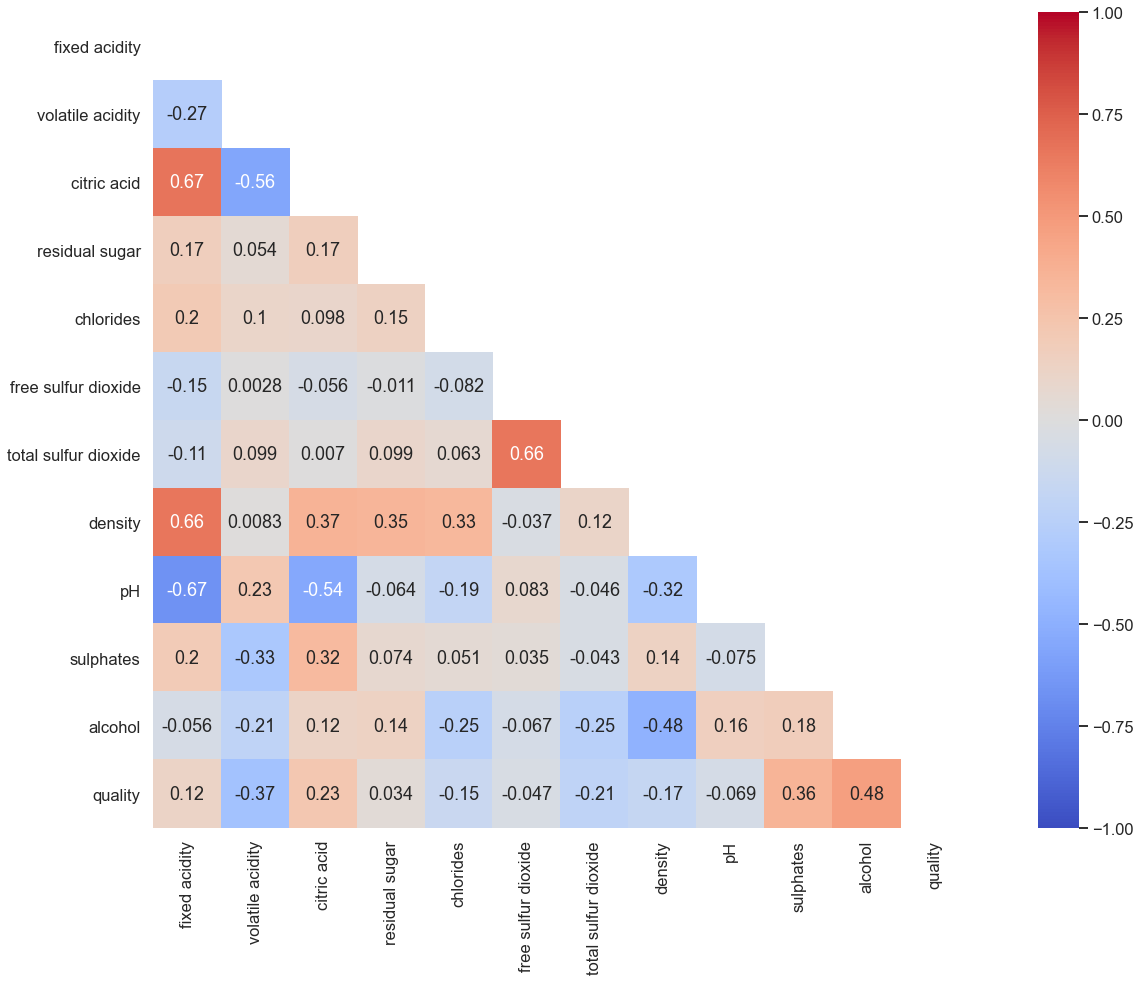

In [26]:
get_heatmap(red_dataset_corrnout, r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots', '\\red_corrnout')

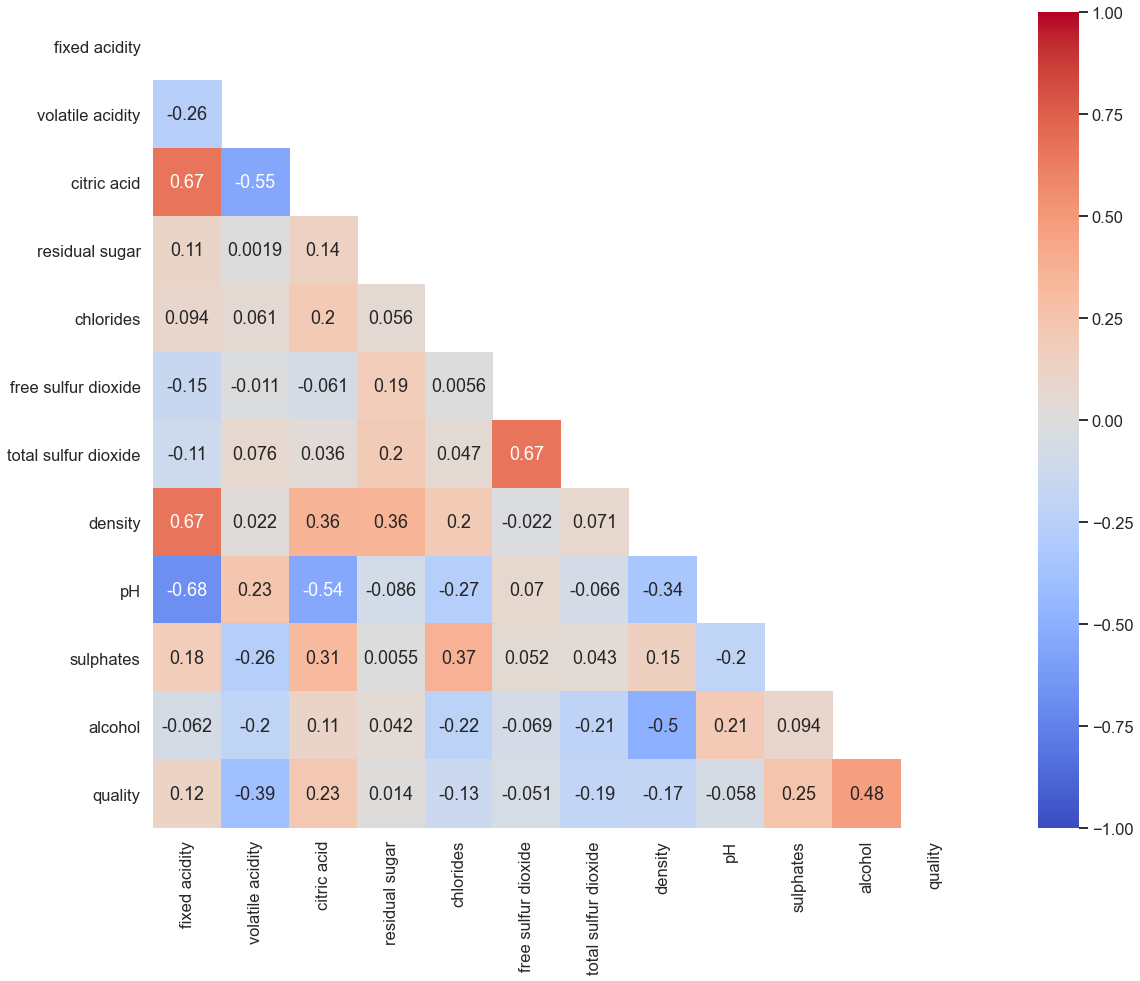

In [27]:
get_heatmap(red_dataset_corr, r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots', '\\red_corr')

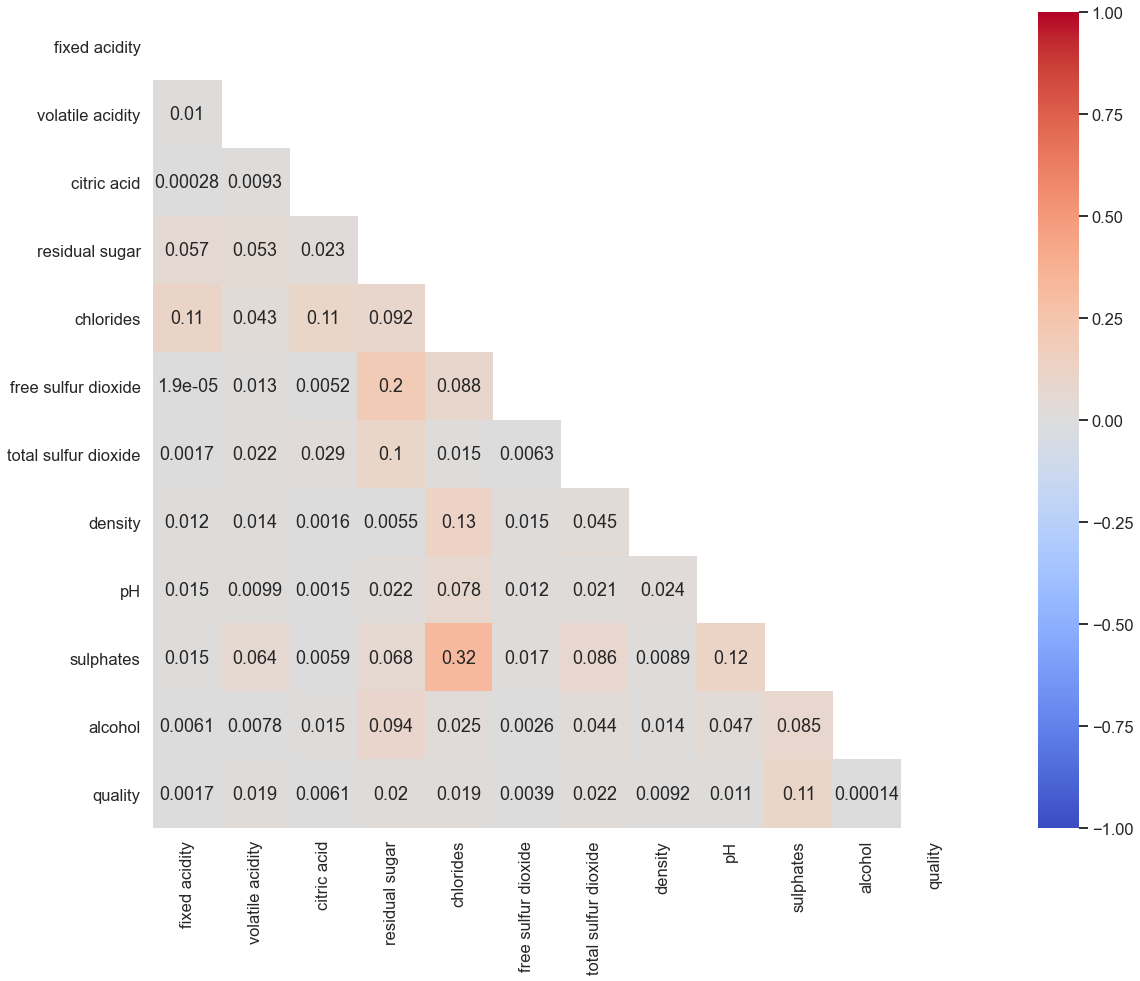

In [28]:
get_heatmap(diff_corred, r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots', '\\diff_red_corr')

## White analysis
### White dataset exploratory analysis

In [29]:
white_dataset = pd.read_csv(r'C:\Users\giovanni\Desktop\datasets\wine_quality\winequality-white.csv', sep=';')
white_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [30]:
white_dataset.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [31]:
white_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
white_dataset_nout = replace_outliers(white_dataset)
white_dataset_nout

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [33]:
white_dataset_nout.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4852.000000,4817.000000,4813.000000,4889.000000,4796.000000,4866.000000,4886.000000,4895.000000,4866.000000,4850.000000,4898.000000,4898.000000
mean,6.830802,0.271535,0.326273,6.347709,0.043229,34.811139,138.042878,0.994012,3.184994,0.485569,10.514267,5.877909
std,0.791163,0.086252,0.104800,4.941429,0.011739,15.654058,41.611813,0.002903,0.145239,0.106075,1.230621,0.885639
min,4.400000,0.080000,0.000000,0.600000,0.009000,2.000000,18.000000,0.987110,2.740000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.850000,0.050000,45.000000,167.000000,0.996100,3.280000,0.540000,11.400000,6.000000
max,9.300000,0.580000,0.690000,20.800000,0.110000,86.000000,260.000000,1.002950,3.640000,0.830000,14.200000,9.000000


In [34]:
white_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [35]:
summary_dataset_white = summary_table(white_dataset)
summary_dataset_white

,mean,median,variance,standard_deviation,outliers_number,outliers_values
fixed acidity,6.854788,6.80000,0.711968,0.843782,46,"[9.8, 9.8, 10.2, 10.0, 10.3, 9.4, 9.8, 9.6, 9...."
volatile acidity,0.278241,0.26000,0.010157,0.100784,81,"[0.66, 0.66, 0.67, 0.595, 0.67, 0.685, 0.64, 0..."
citric acid,0.334192,0.32000,0.014643,0.121007,85,"[0.88, 0.7, 0.7, 0.71, 0.72, 0.7, 1.66, 1.0, 0..."
residual sugar,6.391415,5.20000,25.720518,5.071540,9,"[22.0, 22.0, 23.5, 31.6, 31.6, 65.8, 26.05, 26..."
chlorides,0.045772,0.04300,0.000477,0.021846,102,"[0.172, 0.17300000000000001, 0.147, 0.2, 0.196..."
free sulfur dioxide,35.308085,34.00000,289.183667,17.005401,32,"[131.0, 87.0, 87.0, 122.5, 88.0, 118.5, 96.0, ..."
total sulfur dioxide,138.360657,134.00000,1805.716751,42.493726,12,"[272.0, 313.0, 366.5, 307.5, 344.0, 282.0, 303..."
density,0.994027,0.99374,0.000009,0.002991,3,"[1.0103, 1.0103, 1.03898]"
pH,3.188267,3.18000,0.022797,0.150985,32,"[3.69, 3.72, 3.72, 3.72, 3.66, 3.82, 3.81, 3.6..."
sulphates,0.489847,0.47000,0.013022,0.114114,48,"[0.84, 0.85, 0.85, 0.96, 0.97, 0.95, 0.95, 0.9..."


In [36]:
summary_dataset_white_nout = summary_table(white_dataset_nout)
summary_dataset_white_nout

,mean,median,variance,standard_deviation,outliers_number,outliers_values
fixed acidity,6.830802,6.80000,0.625810,0.791081,6,"[9.3, 9.3, 9.3, 4.4, 4.4, 4.4]"
volatile acidity,0.271535,0.26000,0.007438,0.086243,47,"[0.54, 0.54, 0.57, 0.58, 0.58, 0.55, 0.55, 0.5..."
citric acid,0.326273,0.31000,0.010981,0.104789,60,"[0.66, 0.66, 0.0, 0.67, 0.67, 0.0, 0.0, 0.65, ..."
residual sugar,6.347709,5.20000,24.412729,4.940924,0,[]
chlorides,0.043229,0.04300,0.000138,0.011738,70,"[0.08, 0.092, 0.08199999999999999, 0.092, 0.08..."
free sulfur dioxide,34.811139,34.00000,244.999165,15.652449,11,"[82.0, 82.5, 83.0, 83.0, 82.0, 83.0, 83.0, 85...."
total sulfur dioxide,138.042878,134.00000,1731.188552,41.607554,0,[]
density,0.994012,0.99373,0.000008,0.002903,2,"[1.00295, 1.00295]"
pH,3.184994,3.18000,0.021090,0.145224,9,"[3.63, 3.64, 3.64, 2.74, 3.63, 3.63, 3.63, 3.6..."
sulphates,0.485569,0.47000,0.011250,0.106064,20,"[0.82, 0.82, 0.82, 0.82, 0.81, 0.81, 0.82, 0.8..."


In [37]:
white_dataset_corr = white_dataset.corr()
white_dataset_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [38]:
white_dataset_corrnout = white_dataset_nout.corr()
white_dataset_corrnout

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.029153,0.287724,0.104322,0.081936,-0.024599,0.092800,0.267256,-0.399896,-0.008135,-0.117198,-0.090050
volatile acidity,-0.029153,1.000000,-0.146305,0.067318,0.017303,-0.078260,0.105431,0.003896,-0.041136,-0.038027,0.077662,-0.152413
citric acid,0.287724,-0.146305,1.000000,0.078728,0.025438,0.118116,0.111315,0.138413,-0.163869,0.066043,-0.066624,0.017922
residual sugar,0.104322,0.067318,0.078728,1.000000,0.236711,0.342497,0.416236,0.831054,-0.193324,-0.012172,-0.461488,-0.098487
chlorides,0.081936,0.017303,0.025438,0.236711,1.000000,0.121863,0.324294,0.451993,-0.039810,0.078364,-0.511873,-0.286542
free sulfur dioxide,-0.024599,-0.078260,0.118116,0.342497,0.121863,1.000000,0.612581,0.335740,-0.007493,0.067152,-0.265333,0.034395
total sulfur dioxide,0.092800,0.105431,0.111315,0.416236,0.324294,0.612581,1.000000,0.549509,-0.000592,0.154952,-0.455732,-0.165682
density,0.267256,0.003896,0.138413,0.831054,0.451993,0.335740,0.549509,1.000000,-0.105870,0.100135,-0.804152,-0.317232
pH,-0.399896,-0.041136,-0.163869,-0.193324,-0.039810,-0.007493,-0.000592,-0.105870,1.000000,0.150209,0.124223,0.107379
sulphates,-0.008135,-0.038027,0.066043,-0.012172,0.078364,0.067152,0.154952,0.100135,0.150209,1.000000,-0.047083,0.033781


In [39]:
diff_corrwhite = np.abs(white_dataset_corrnout - white_dataset_corr)
diff_corrwhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.000000,0.006456,0.001457,0.015301,0.058850,0.024797,0.001730,0.001925,0.025962,0.009008,0.003683,0.023613
volatile acidity,0.006456,0.000000,0.003167,0.003032,0.053208,0.018752,0.016170,0.023218,0.009221,0.002299,0.009944,0.042310
citric acid,0.001457,0.003167,0.000000,0.015483,0.088927,0.024039,0.009815,0.011089,0.000121,0.003712,0.009105,0.027131
residual sugar,0.015301,0.003032,0.015483,0.000000,0.148027,0.043398,0.014797,0.007912,0.000810,0.014492,0.010856,0.000911
chlorides,0.058850,0.053208,0.088927,0.148027,0.000000,0.020470,0.125384,0.194782,0.050630,0.061601,0.151684,0.076608
free sulfur dioxide,0.024797,0.018752,0.024039,0.043398,0.020470,0.000000,0.002920,0.041529,0.006875,0.007934,0.015229,0.026237
total sulfur dioxide,0.001730,0.016170,0.009815,0.014797,0.125384,0.002920,0.000000,0.019627,0.002913,0.020390,0.006840,0.009056
density,0.001925,0.023218,0.011089,0.007912,0.194782,0.041529,0.019627,0.000000,0.012279,0.025642,0.024014,0.010109
pH,0.025962,0.009221,0.000121,0.000810,0.050630,0.006875,0.002913,0.012279,0.000000,0.005743,0.002791,0.007952
sulphates,0.009008,0.002299,0.003712,0.014492,0.061601,0.007934,0.020390,0.025642,0.005743,0.000000,0.029650,0.019897


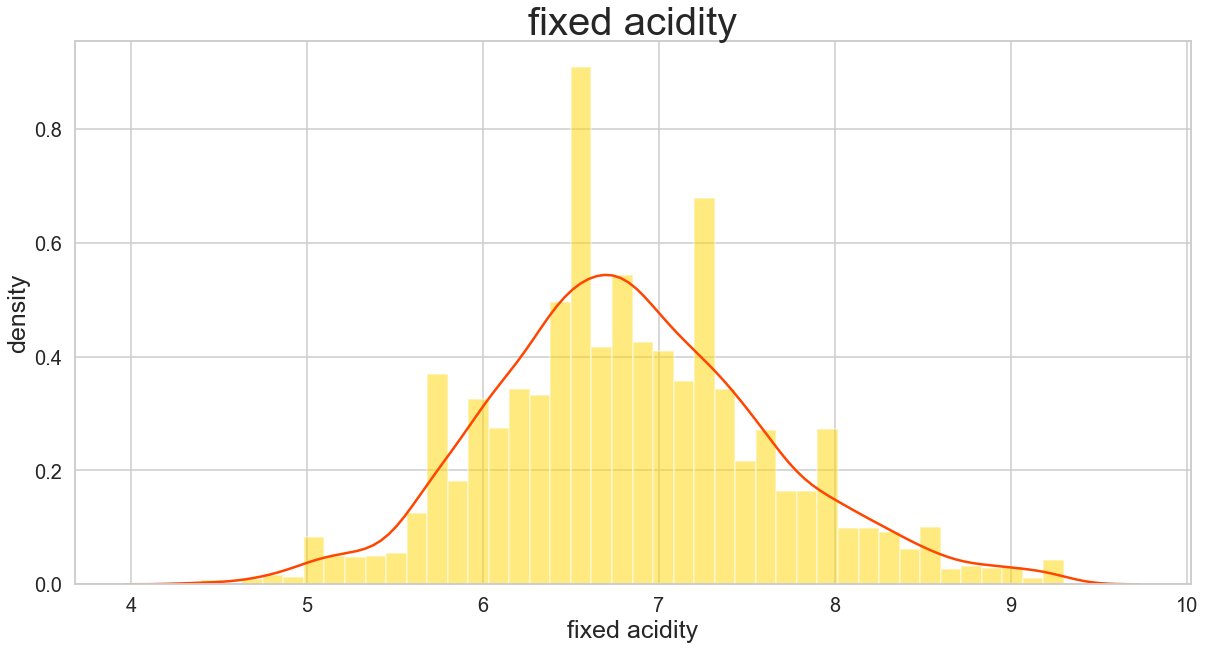

In [40]:
#-----Better to use a custom plot instead of the function get_histograms in this case-----#
#get_boxplots(white_dataset_nout, 'gold', r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots\hist', 'white')
lista_colonne = list(white_dataset_nout)
for c in lista_colonne:
    plt.figure(figsize=(20,10))
    white = sns.distplot(white_dataset_nout[c], hist_kws={'alpha':0.5, 'color':'gold'}, kde_kws={'color':'orangered'})
    white.axes.set_title(c,fontsize=40)
    white.set_xlabel(c,fontsize=25)
    white.set_ylabel('density',fontsize=25)
    white.tick_params(labelsize=20)
    break #the break is just for preventing the code to run fully everytime, needs to be removed manualy in the first run!
    plt.savefig(r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots\hist_white_'+c)

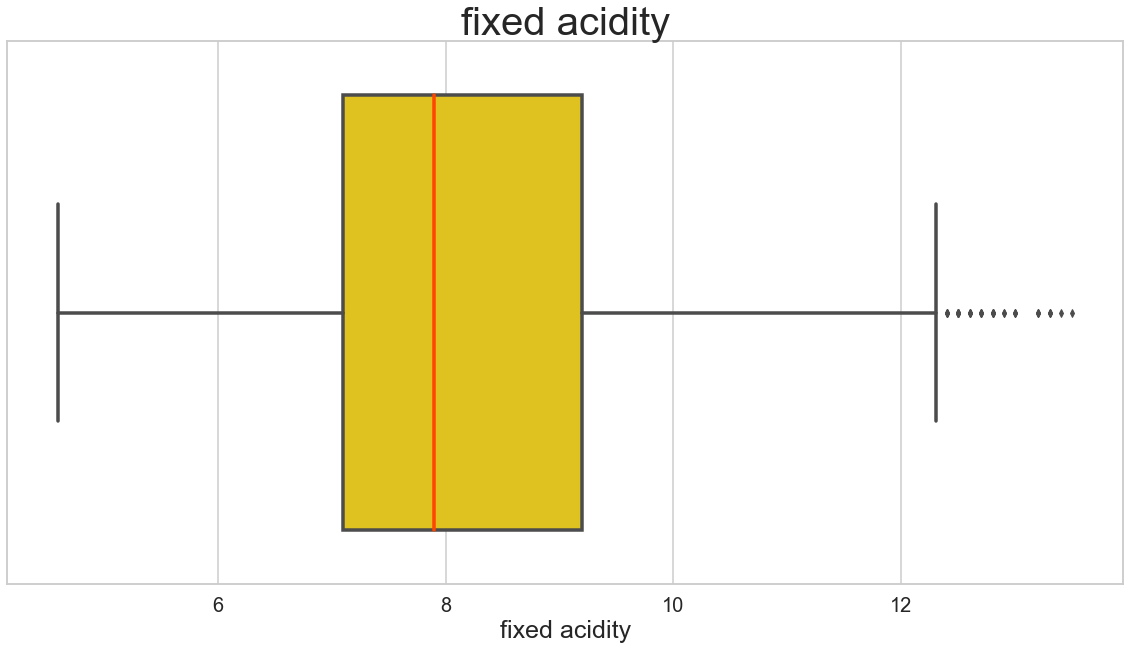

In [41]:
for c in lista_colonne:
    plt.figure(figsize=(20,10))
    white_box = sns.boxplot(x=red_dataset_nout[c], color='gold', linewidth=3.5, medianprops=dict(color="orangered", alpha=1.0))
    white_box.axes.set_title(c,fontsize=40)
    white_box.set_xlabel(c,fontsize=25)
    white_box.tick_params(labelsize=20)
    break #the break is just for preventing the code to run fully everytime, needs to be removed manualy in the first run!
    plt.savefig(r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots\boxplot_white_'+c)

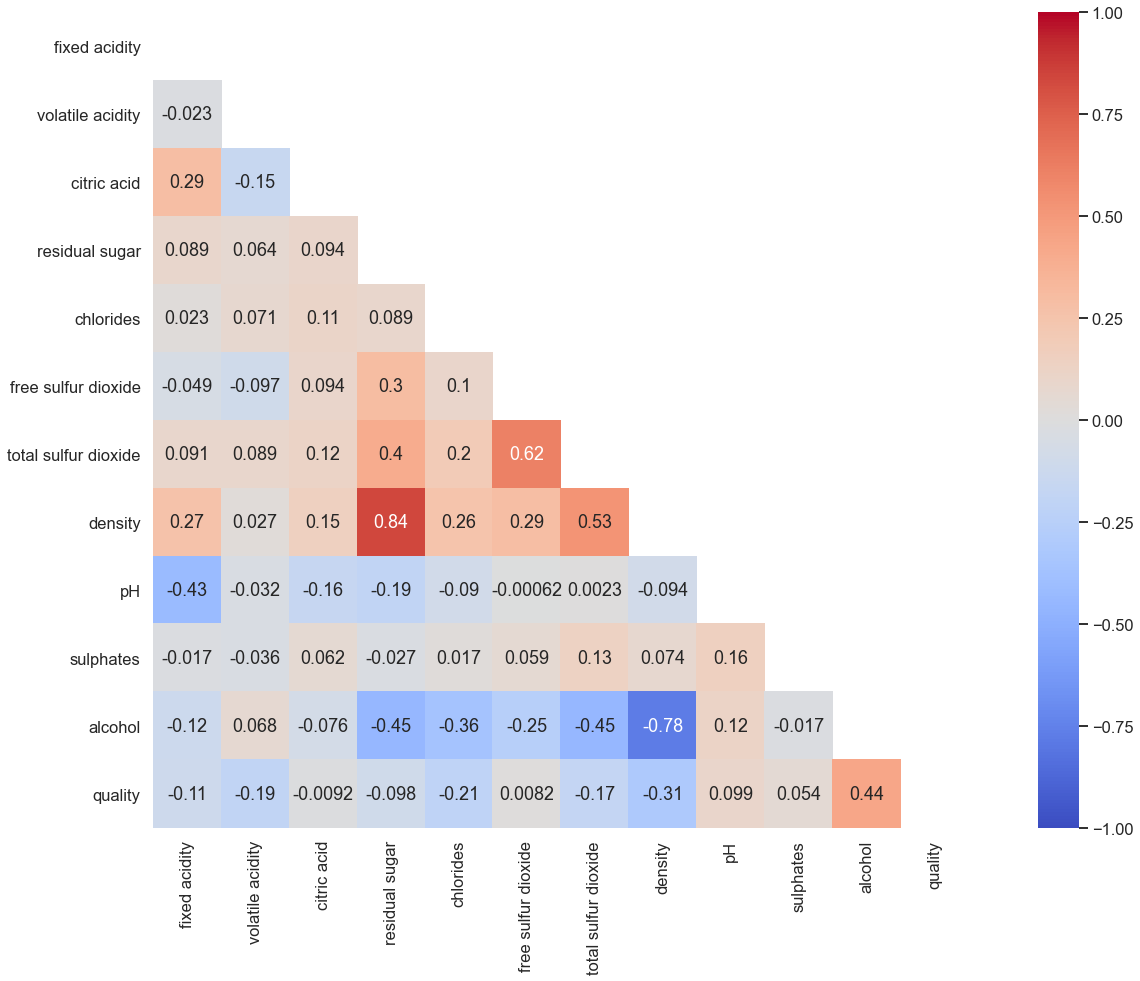

In [42]:
get_heatmap(white_dataset_corr, r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots', '\\white_corr')

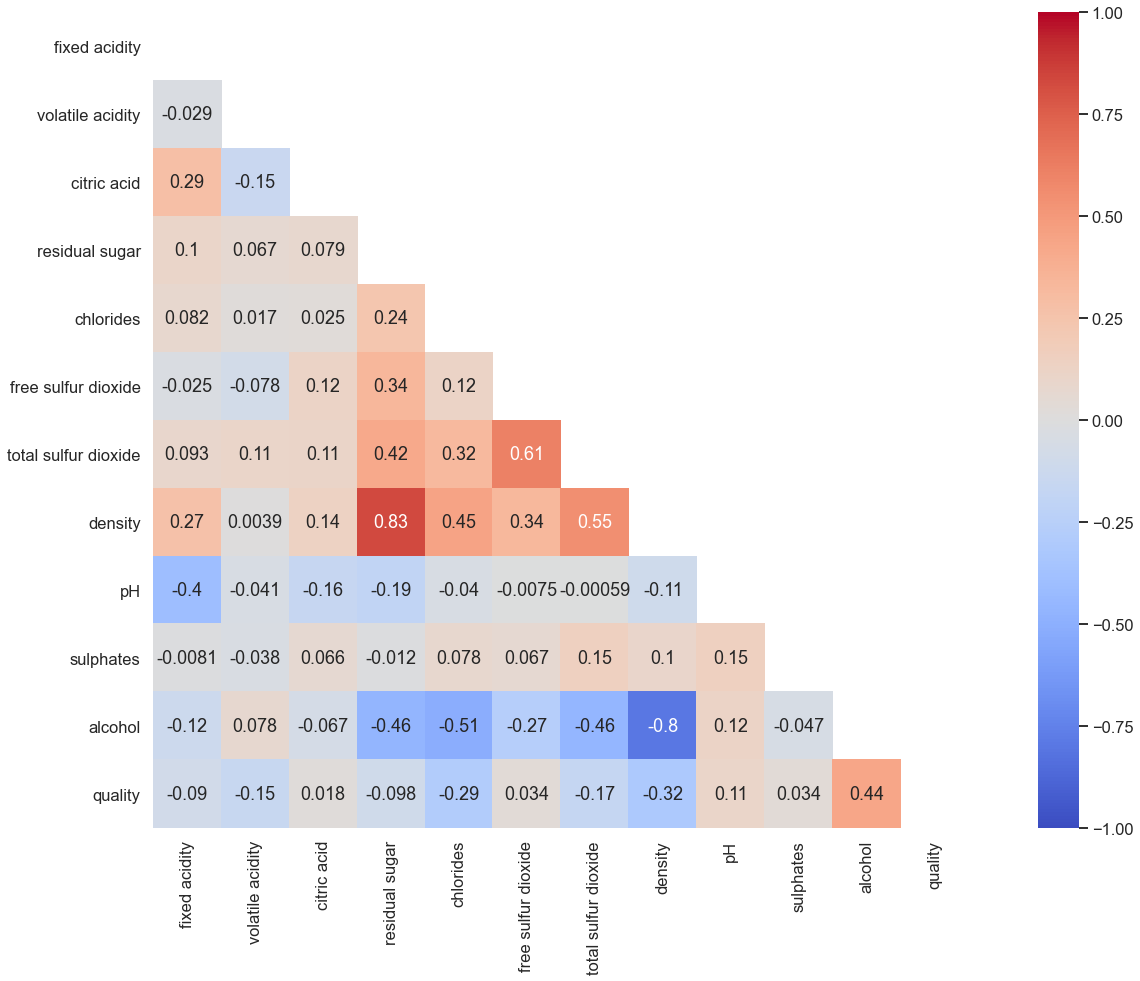

In [43]:
get_heatmap(white_dataset_corrnout, r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots', '\\white_corrnout')

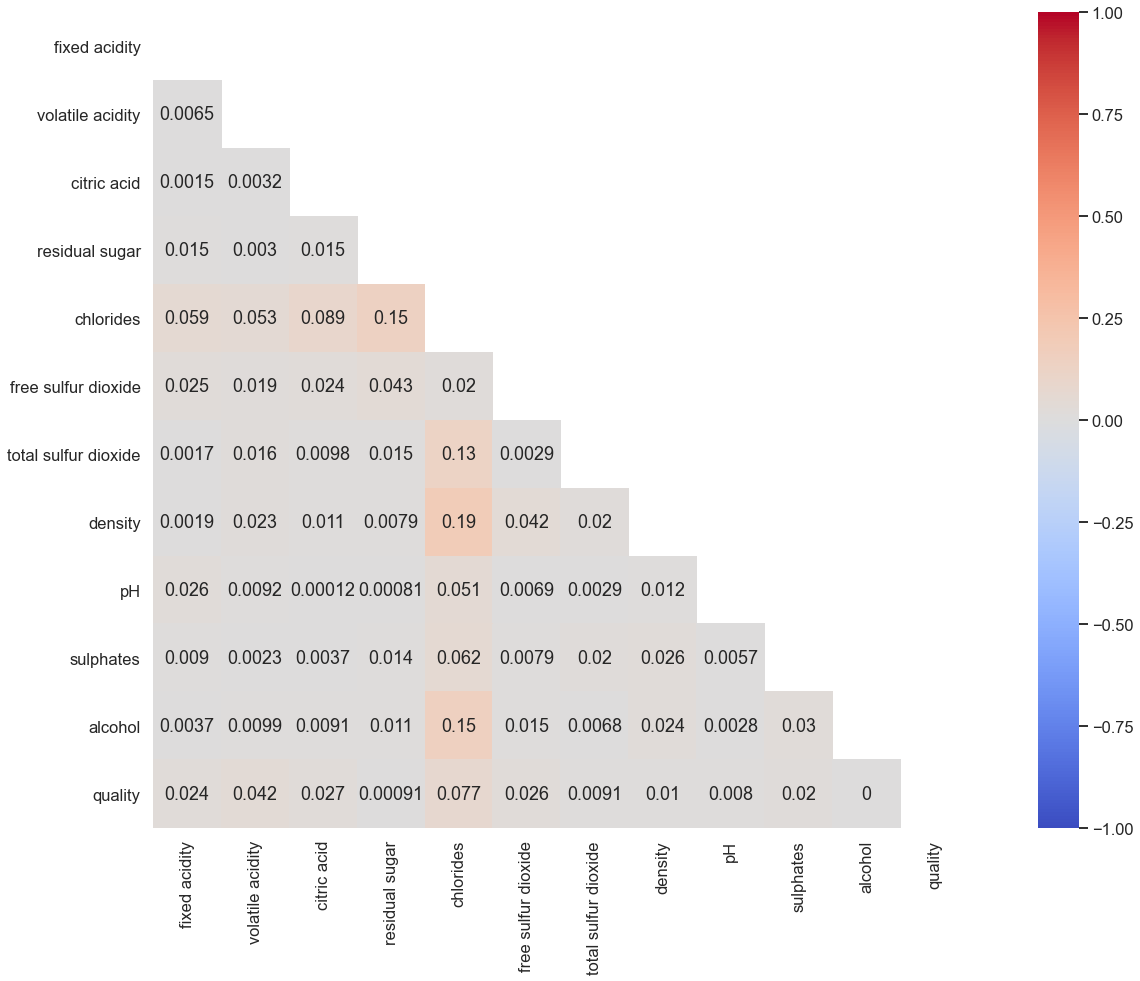

In [44]:
get_heatmap(diff_corrwhite, r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots', '\\diff_white_corr')

## Difference in correlation between white and red 

In [45]:
diff_corrall = np.abs(red_dataset_corrnout - white_dataset_corrnout)
diff_corrall

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.000000,0.237432,0.383699,0.067268,0.121565,0.129214,0.204237,0.389173,0.267773,0.205663,0.061653,0.212381
volatile acidity,0.237432,0.000000,0.415442,0.012853,0.086956,0.081092,0.006676,0.004398,0.266187,0.287150,0.287752,0.219441
citric acid,0.383699,0.415442,0.000000,0.088329,0.072867,0.173870,0.104317,0.228126,0.376497,0.252638,0.191174,0.214517
residual sugar,0.067268,0.012853,0.088329,0.000000,0.088786,0.353017,0.316920,0.481232,0.129607,0.086178,0.597977,0.132713
chlorides,0.121565,0.086956,0.072867,0.088786,0.000000,0.203930,0.261717,0.120731,0.147330,0.027850,0.266110,0.138241
free sulfur dioxide,0.129214,0.081092,0.173870,0.353017,0.203930,0.000000,0.048806,0.372758,0.090081,0.032070,0.198481,0.081200
total sulfur dioxide,0.204237,0.006676,0.104317,0.316920,0.261717,0.048806,0.000000,0.433160,0.045108,0.197912,0.206363,0.041225
density,0.389173,0.004398,0.228126,0.481232,0.120731,0.372758,0.433160,0.000000,0.211904,0.039517,0.321935,0.151522
pH,0.267773,0.266187,0.376497,0.129607,0.147330,0.090081,0.045108,0.211904,0.000000,0.225279,0.034822,0.176420
sulphates,0.205663,0.287150,0.252638,0.086178,0.027850,0.032070,0.197912,0.039517,0.225279,0.000000,0.226113,0.323156


In [46]:
#correlation directly on dataframe
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(diff_corrall, dtype=bool)
mask[np.triu_indices_from(mask)] = True
diff_corrall[mask] = np.nan
(diff_corrall
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))
#transposed_corr.style.background_gradient(cmap='coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
volatile acidity,0.24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
citric acid,0.38,0.42,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
residual sugar,0.07,0.01,0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan
chlorides,0.12,0.09,0.07,0.09,nan,nan,nan,nan,nan,nan,nan,nan
free sulfur dioxide,0.13,0.08,0.17,0.35,0.20,nan,nan,nan,nan,nan,nan,nan
total sulfur dioxide,0.20,0.01,0.10,0.32,0.26,0.05,nan,nan,nan,nan,nan,nan
density,0.39,0.00,0.23,0.48,0.12,0.37,0.43,nan,nan,nan,nan,nan
pH,0.27,0.27,0.38,0.13,0.15,0.09,0.05,0.21,nan,nan,nan,nan
sulphates,0.21,0.29,0.25,0.09,0.03,0.03,0.20,0.04,0.23,nan,nan,nan


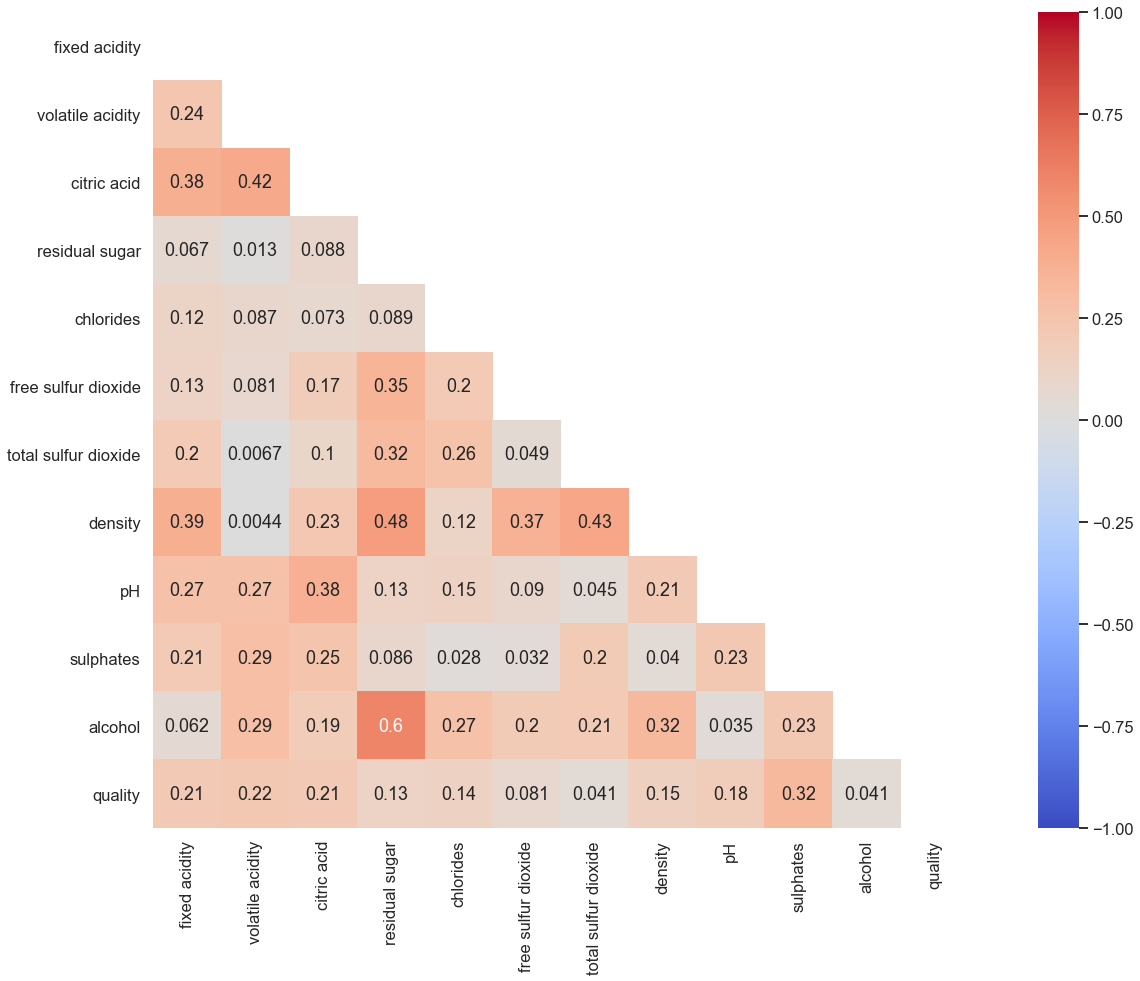

In [47]:
get_heatmap(diff_corrall, r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots', '\\diff_corrall')

In [48]:
diff_corrallout = np.abs(red_dataset_corr - white_dataset_corr)
diff_corrallout

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.000000,0.233434,0.382523,0.025756,0.070620,0.104398,0.204251,0.402716,0.257120,0.200149,0.059213,0.237714
volatile acidity,0.233434,0.000000,0.403024,0.062368,0.009214,0.086508,0.012790,0.005088,0.266853,0.225259,0.270006,0.195835
citric acid,0.382523,0.403024,0.000000,0.049366,0.089458,0.155055,0.085598,0.215445,0.378156,0.250439,0.185632,0.235582
residual sugar,0.025756,0.062368,0.049366,0.000000,0.033075,0.112049,0.198411,0.483683,0.108481,0.032191,0.492707,0.111308
chlorides,0.070620,0.009214,0.089458,0.033075,0.000000,0.095830,0.151510,0.056579,0.174587,0.354498,0.139048,0.081028
free sulfur dioxide,0.104398,0.086508,0.155055,0.112049,0.095830,0.000000,0.052165,0.316156,0.070995,0.007560,0.180696,0.058814
total sulfur dioxide,0.204251,0.012790,0.085598,0.198411,0.151510,0.052165,0.000000,0.458612,0.068816,0.091616,0.243238,0.010363
density,0.402716,0.005088,0.215445,0.483683,0.056579,0.316156,0.458612,0.000000,0.248108,0.074013,0.283958,0.132204
pH,0.257120,0.266853,0.378156,0.108481,0.174587,0.070995,0.068816,0.248108,0.000000,0.352599,0.084200,0.157159
sulphates,0.200149,0.225259,0.250439,0.032191,0.354498,0.007560,0.091616,0.074013,0.352599,0.000000,0.111028,0.197719


In [49]:
#correlation directly on dataframe
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(diff_corrallout, dtype=bool)
mask[np.triu_indices_from(mask)] = True
diff_corrallout[mask] = np.nan
(diff_corrallout
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))
#transposed_corr.style.background_gradient(cmap='coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
volatile acidity,0.23,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
citric acid,0.38,0.40,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
residual sugar,0.03,0.06,0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan
chlorides,0.07,0.01,0.09,0.03,nan,nan,nan,nan,nan,nan,nan,nan
free sulfur dioxide,0.10,0.09,0.16,0.11,0.10,nan,nan,nan,nan,nan,nan,nan
total sulfur dioxide,0.20,0.01,0.09,0.20,0.15,0.05,nan,nan,nan,nan,nan,nan
density,0.40,0.01,0.22,0.48,0.06,0.32,0.46,nan,nan,nan,nan,nan
pH,0.26,0.27,0.38,0.11,0.17,0.07,0.07,0.25,nan,nan,nan,nan
sulphates,0.20,0.23,0.25,0.03,0.35,0.01,0.09,0.07,0.35,nan,nan,nan


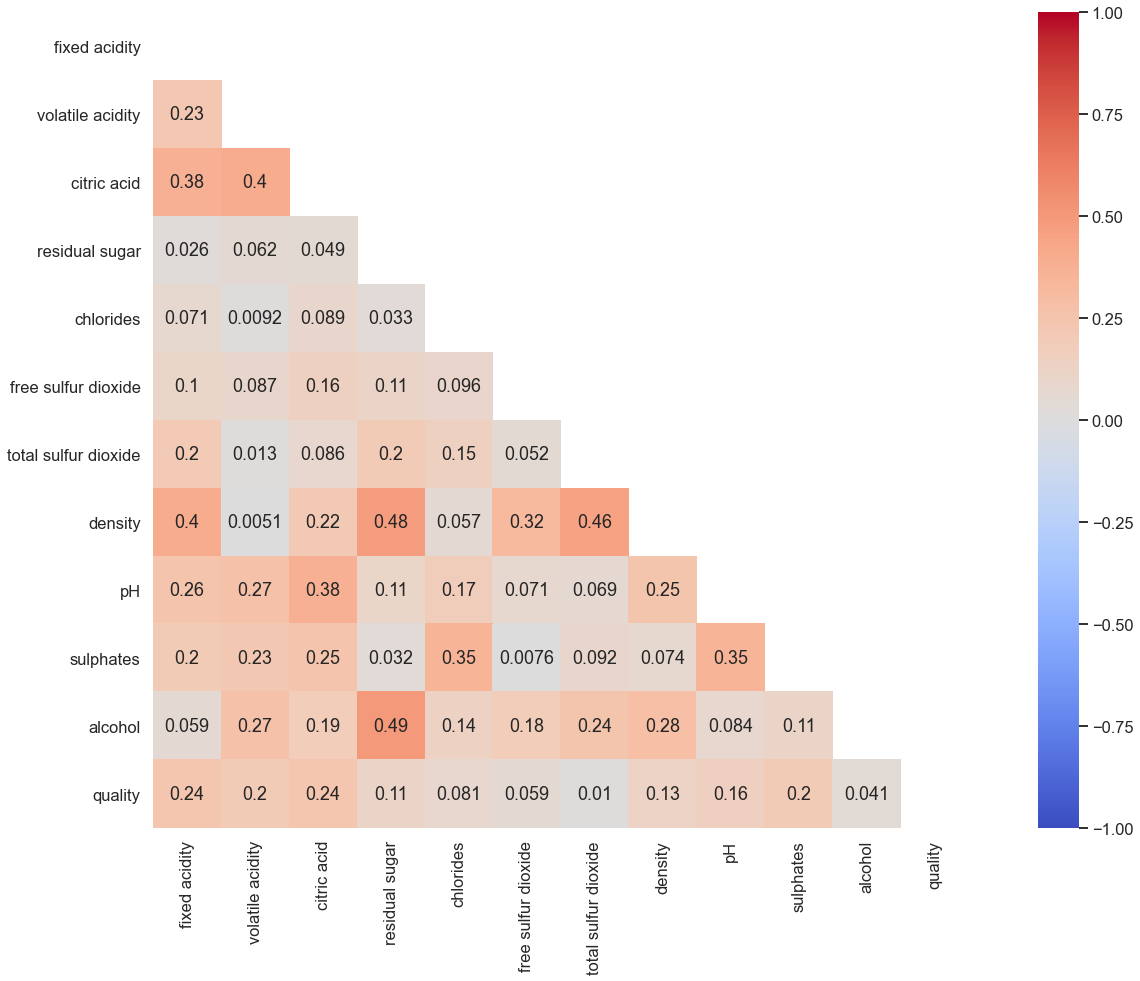

In [50]:
get_heatmap(diff_corrallout, r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots', '\\diff_corrallout')

## Trying to analyse everything together

In [51]:
all_wines_nout = pd.concat([red_dataset_nout, white_dataset_nout])
all_wines_nout

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [52]:
all_wines_nout_summary = summary_table(all_wines_nout)
all_wines_nout_summary

,mean,median,variance,standard_deviation,outliers_number,outliers_values
fixed acidity,7.185673,7.00000,1.528837,1.236461,134,"[11.2, 11.5, 12.8, 12.8, 11.0, 11.6, 12.0, 11...."
volatile acidity,0.334018,0.29000,0.024629,0.156936,94,"[0.88, 0.935, 1.02, 0.9, 1.04, 0.95, 0.885, 0...."
citric acid,0.312376,0.31000,0.018201,0.134912,14,"[0.74, 0.74, 0.76, 0.79, 0.76, 0.73, 0.72, 0.7..."
residual sugar,5.387612,3.00000,21.545644,4.641729,26,"[20.7, 20.7, 19.45, 19.45, 19.8, 20.8, 19.45, ..."
chlorides,0.052780,0.04700,0.000513,0.022647,69,"[0.17600000000000002, 0.17, 0.172, 0.122, 0.17..."
free sulfur dioxide,30.044234,29.00000,276.938832,16.641479,19,"[81.0, 82.0, 82.5, 83.0, 83.0, 81.0, 80.0, 82...."
total sulfur dioxide,115.338408,118.00000,3124.663030,55.898685,0,[]
density,0.994675,0.99488,0.000009,0.002916,0,[]
pH,3.215530,3.21000,0.024221,0.155630,15,"[3.75, 3.69, 3.69, 3.74, 3.72, 3.71, 3.69, 3.6..."
sulphates,0.524671,0.50000,0.017661,0.132896,62,"[0.93, 1.08, 0.95, 1.12, 1.14, 0.93, 0.93, 1.0..."


In [53]:
all_wines_corrnout = all_wines_nout.corr()
all_wines_corrnout

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.245210,0.332836,-0.120060,0.456508,-0.293378,-0.345051,0.459985,-0.211616,0.319453,-0.095157,-0.069052
volatile acidity,0.245210,1.000000,-0.393544,-0.221645,0.544598,-0.380907,-0.449819,0.282457,0.279690,0.258850,-0.044089,-0.242557
citric acid,0.332836,-0.393544,1.000000,0.127166,-0.096056,0.143112,0.179853,0.085709,-0.336406,0.048976,0.006055,0.109258
residual sugar,-0.120060,-0.221645,0.127166,1.000000,-0.165078,0.443590,0.512840,0.531675,-0.273849,-0.192940,-0.366682,-0.035774
chlorides,0.456508,0.544598,-0.096056,-0.165078,1.000000,-0.338230,-0.423408,0.524849,0.198049,0.415058,-0.291359,-0.236138
free sulfur dioxide,-0.293378,-0.380907,0.143112,0.443590,-0.338230,1.000000,0.733853,0.033565,-0.166527,-0.216784,-0.184439,0.078997
total sulfur dioxide,-0.345051,-0.449819,0.179853,0.512840,-0.423408,0.733853,1.000000,0.031511,-0.252486,-0.306128,-0.266737,-0.033931
density,0.459985,0.282457,0.085709,0.531675,0.524849,0.033565,0.031511,1.000000,0.020990,0.285919,-0.706524,-0.313046
pH,-0.211616,0.279690,-0.336406,-0.273849,0.198049,-0.166527,-0.252486,0.020990,1.000000,0.250566,0.108664,0.020481
sulphates,0.319453,0.258850,0.048976,-0.192940,0.415058,-0.216784,-0.306128,0.285919,0.250566,1.000000,-0.007114,0.043901


In [54]:
mask = np.zeros_like(all_wines_corrnout, dtype=bool)
mask[np.triu_indices_from(mask)] = True
all_wines_corrnout[mask] = np.nan
(all_wines_corrnout
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
volatile acidity,0.25,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
citric acid,0.33,-0.39,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
residual sugar,-0.12,-0.22,0.13,nan,nan,nan,nan,nan,nan,nan,nan,nan
chlorides,0.46,0.54,-0.10,-0.17,nan,nan,nan,nan,nan,nan,nan,nan
free sulfur dioxide,-0.29,-0.38,0.14,0.44,-0.34,nan,nan,nan,nan,nan,nan,nan
total sulfur dioxide,-0.35,-0.45,0.18,0.51,-0.42,0.73,nan,nan,nan,nan,nan,nan
density,0.46,0.28,0.09,0.53,0.52,0.03,0.03,nan,nan,nan,nan,nan
pH,-0.21,0.28,-0.34,-0.27,0.20,-0.17,-0.25,0.02,nan,nan,nan,nan
sulphates,0.32,0.26,0.05,-0.19,0.42,-0.22,-0.31,0.29,0.25,nan,nan,nan


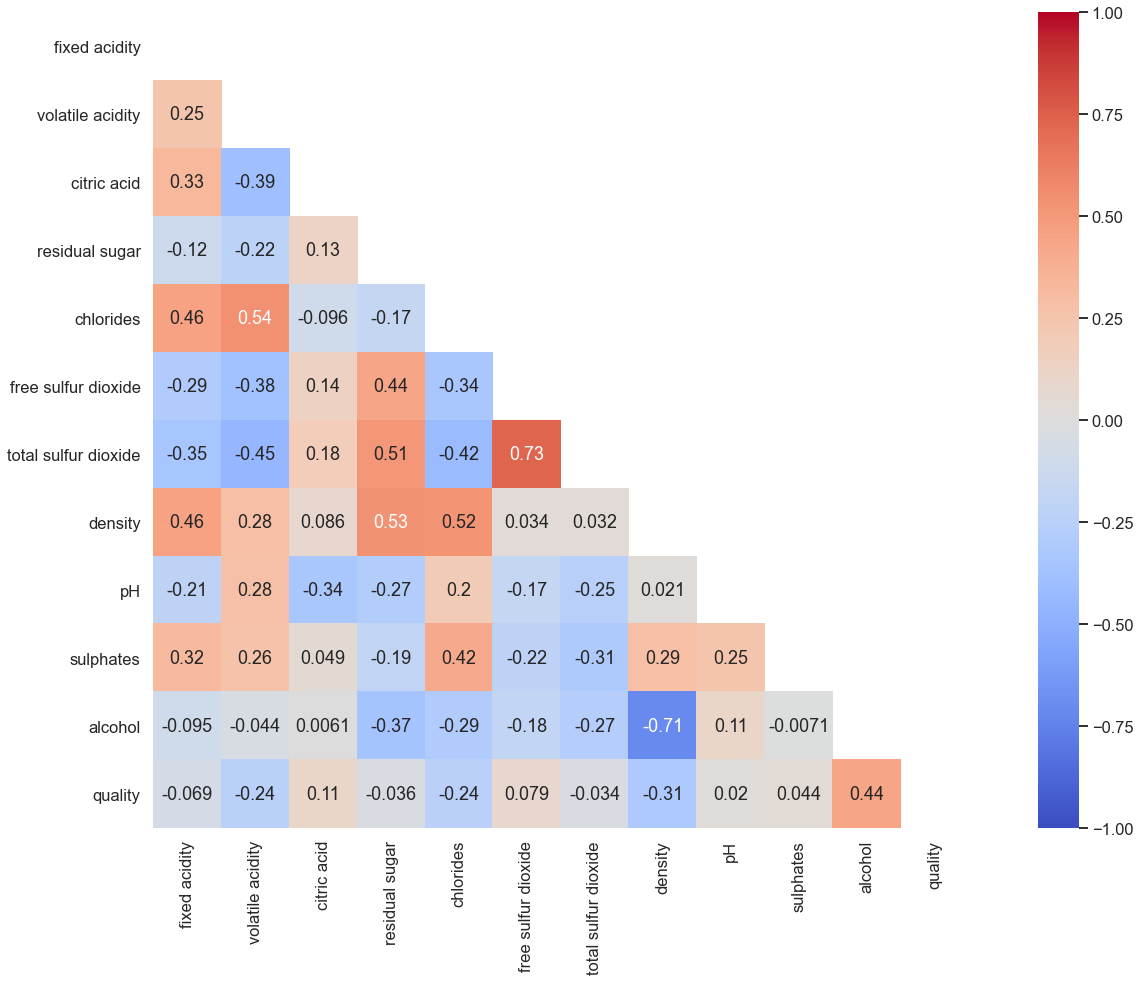

In [55]:
get_heatmap(all_wines_corrnout, r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots', '\\all_corrnout')

In [56]:
all_wines = pd.concat([red_dataset, white_dataset])
all_wines_summary = summary_table(all_wines_nout)
all_wines_summary

,mean,median,variance,standard_deviation,outliers_number,outliers_values
fixed acidity,7.185673,7.00000,1.528837,1.236461,134,"[11.2, 11.5, 12.8, 12.8, 11.0, 11.6, 12.0, 11...."
volatile acidity,0.334018,0.29000,0.024629,0.156936,94,"[0.88, 0.935, 1.02, 0.9, 1.04, 0.95, 0.885, 0...."
citric acid,0.312376,0.31000,0.018201,0.134912,14,"[0.74, 0.74, 0.76, 0.79, 0.76, 0.73, 0.72, 0.7..."
residual sugar,5.387612,3.00000,21.545644,4.641729,26,"[20.7, 20.7, 19.45, 19.45, 19.8, 20.8, 19.45, ..."
chlorides,0.052780,0.04700,0.000513,0.022647,69,"[0.17600000000000002, 0.17, 0.172, 0.122, 0.17..."
free sulfur dioxide,30.044234,29.00000,276.938832,16.641479,19,"[81.0, 82.0, 82.5, 83.0, 83.0, 81.0, 80.0, 82...."
total sulfur dioxide,115.338408,118.00000,3124.663030,55.898685,0,[]
density,0.994675,0.99488,0.000009,0.002916,0,[]
pH,3.215530,3.21000,0.024221,0.155630,15,"[3.75, 3.69, 3.69, 3.74, 3.72, 3.71, 3.69, 3.6..."
sulphates,0.524671,0.50000,0.017661,0.132896,62,"[0.93, 1.08, 0.95, 1.12, 1.14, 0.93, 0.93, 1.0..."


In [57]:
all_wines_corr = all_wines.corr()
all_wines_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


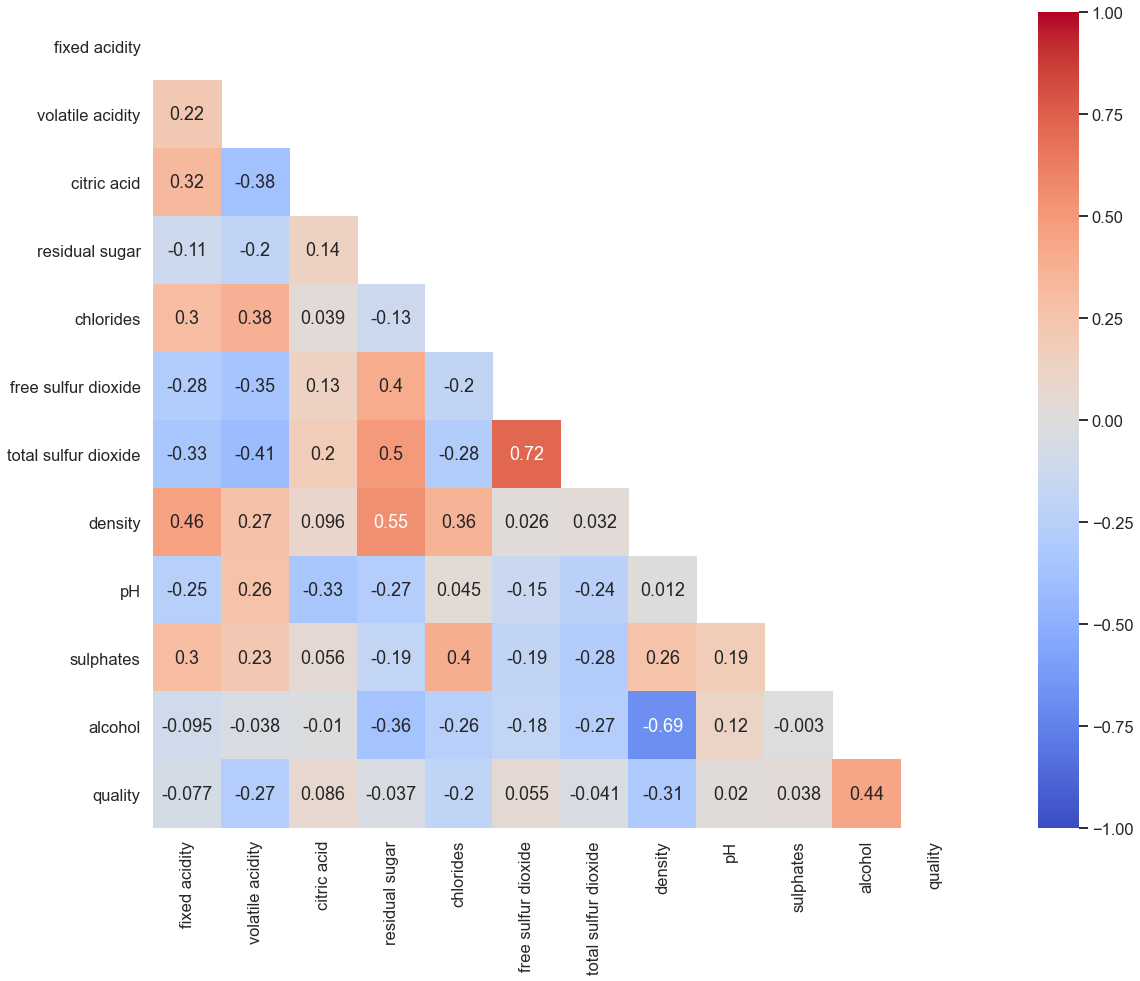

In [58]:
get_heatmap(all_wines_corr, r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots', '\\all_corr')

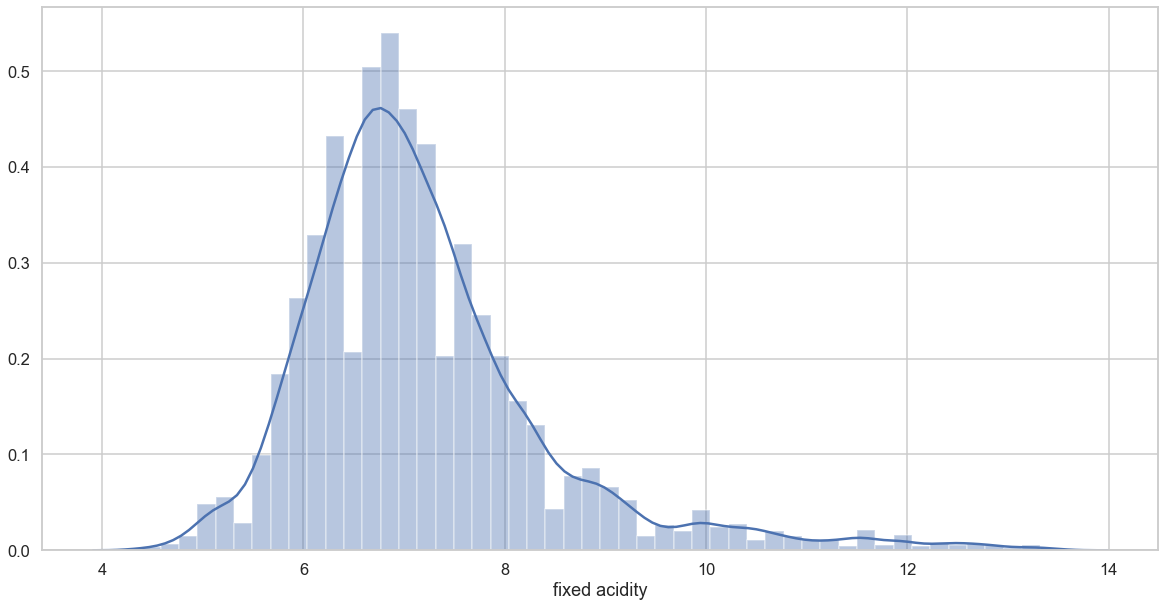

In [59]:
lista_colonne = list(all_wines_nout)
for c in lista_colonne:
    plt.figure(figsize=(20,10))
    sns.distplot(all_wines_nout[c])
    break
    plt.savefig(r'C:\Users\giovanni\Desktop\datasets\wine_quality\plots\all_wines_'+c)

## colorare diversamente gli histogrammi